## 画图

时间：Wed Nov 19 08:44:21 CST 2025

In [2]:
import scanpy as sc

In [6]:
adata = sc.read_10x_mtx(
    "data/filtered_gene_bc_matrices/hg19/"
)

In [7]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

In [10]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,2421.0,73.0,3.015283
AAACATTGAGCTAC-1,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,3149.0,28.0,0.889171
AAACCGTGCTTCCG-1,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,981.0,12.0,1.223242
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,3461.0,73.0,2.109217
TTTCTACTGAGGCA-1,1227,3447.0,32.0,0.928343
TTTCTACTTCCTCG-1,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,1024.0,21.0,2.050781


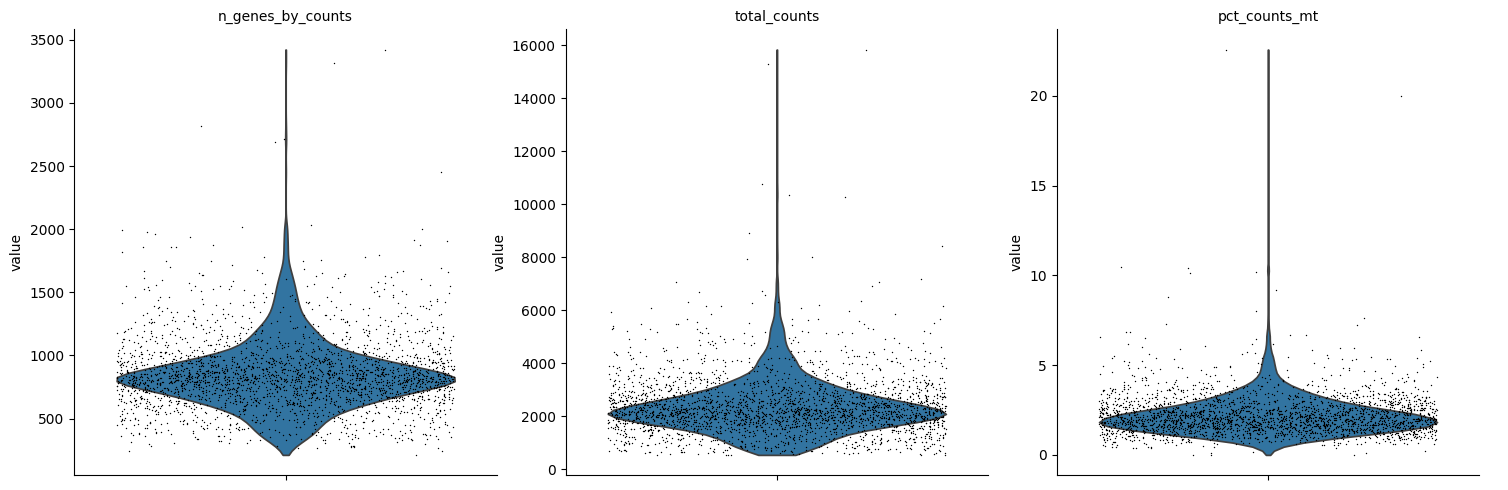

In [11]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

## 源码解析

### sc.pl.violin()

这个函数从 adata.obs 中提取相应的列，然后绘制小提琴图。

源代码较复杂，先明白是针对细胞画图就好。每一个点代表一个细胞。